In [173]:
                        # This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [174]:
titanic_train = pd.read_csv('/kaggle/input/titanic/train.csv')

In [175]:
titanic_test= pd.read_csv('/kaggle/input/titanic/test.csv')

In [176]:
gender_submission = pd.read_csv('/kaggle/input/titanic/gender_submission.csv')


In [177]:
titanic_train.shape

(891, 12)

In [178]:
titanic_test.shape

(418, 11)

In [179]:
titanic_train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [180]:
titanic_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [181]:
#Check for null values in training set:

titanic_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [182]:
177/891
 
# Age attribute has 19.86% null values in training set 



0.19865319865319866

In [183]:
687/891

# Cabin attribute has 77.10% null values in training set

0.7710437710437711

In [184]:
#Check for null values in test set: 

titanic_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [185]:
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [186]:
titanic_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [187]:
#Plotting numerical variables as histograms and boxplots for the titanic training set below:

(array([ 54.,  46., 177., 169., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <BarContainer object of 10 artists>)

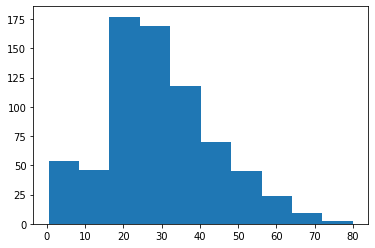

In [188]:
import matplotlib.pyplot as plt
plt.hist(titanic_train['Age'])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Age'>

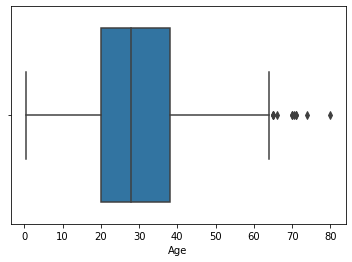

In [189]:
sns.boxplot(titanic_train['Age'])

(array([608., 209.,  28.,  16.,   0.,  18.,   5.,   0.,   0.,   7.]),
 array([0. , 0.8, 1.6, 2.4, 3.2, 4. , 4.8, 5.6, 6.4, 7.2, 8. ]),
 <BarContainer object of 10 artists>)

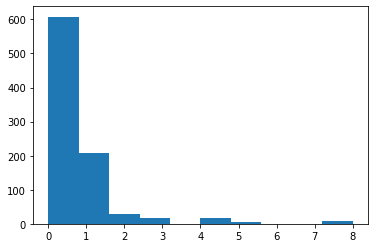

In [190]:
plt.hist(titanic_train['SibSp'])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='SibSp'>

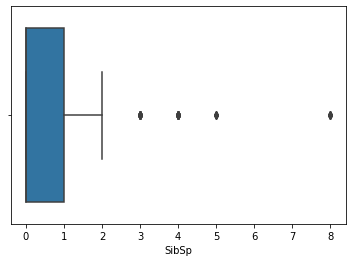

In [191]:
sns.boxplot(titanic_train['SibSp'])

(array([678., 118.,   0.,  80.,   0.,   5.,   4.,   0.,   5.,   1.]),
 array([0. , 0.6, 1.2, 1.8, 2.4, 3. , 3.6, 4.2, 4.8, 5.4, 6. ]),
 <BarContainer object of 10 artists>)

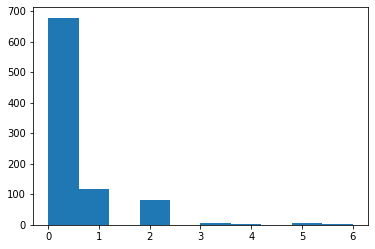

In [192]:
plt.hist(titanic_train['Parch'])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Parch'>

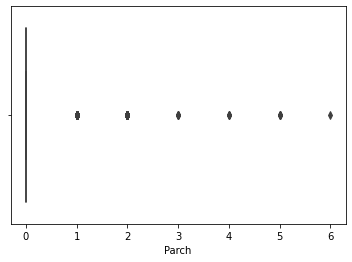

In [193]:
sns.boxplot(titanic_train['Parch'])

(array([732., 106.,  31.,   2.,  11.,   6.,   0.,   0.,   0.,   3.]),
 array([  0.     ,  51.23292, 102.46584, 153.69876, 204.93168, 256.1646 ,
        307.39752, 358.63044, 409.86336, 461.09628, 512.3292 ]),
 <BarContainer object of 10 artists>)

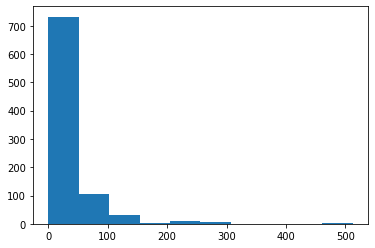

In [194]:
plt.hist(titanic_train['Fare'])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Fare'>

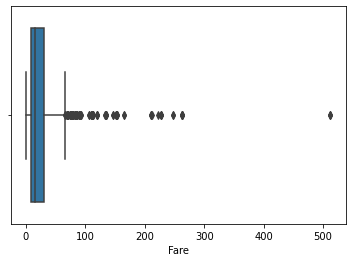

In [195]:
sns.boxplot(titanic_train['Fare'])

In [196]:
numerical_train= titanic_train[['Age', 'SibSp', 'Parch','Fare']]

In [197]:
#Plotting a correlation heatmap for numerical variables below:

<AxesSubplot:>

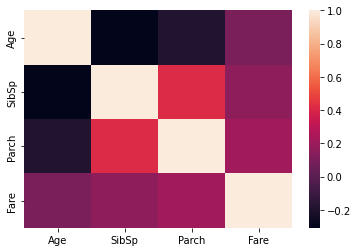

In [198]:
import seaborn as sns
sns.heatmap(numerical_train.corr())

In [199]:
#plotting a correlation heatmap for titanic_training set below:

<AxesSubplot:>

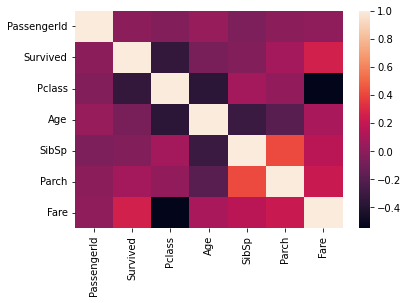

In [200]:
sns.heatmap(titanic_train.corr())

In [201]:
#Plotting categorial variables as bar graphs for the titanic training set below:

<AxesSubplot:>

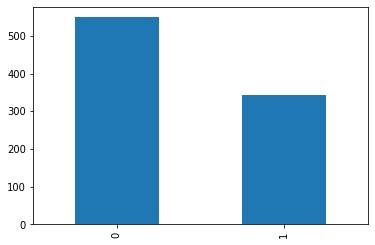

In [202]:
titanic_train['Survived'].value_counts().plot(kind='bar')

<AxesSubplot:>

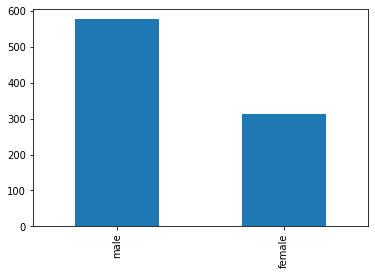

In [203]:
titanic_train['Sex'].value_counts().plot(kind='bar')

<AxesSubplot:>

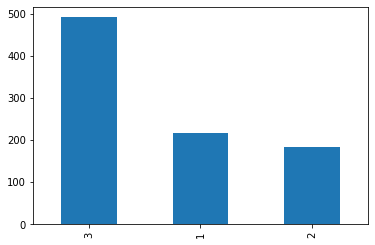

In [204]:
titanic_train['Pclass'].value_counts().plot(kind='bar')

<AxesSubplot:>

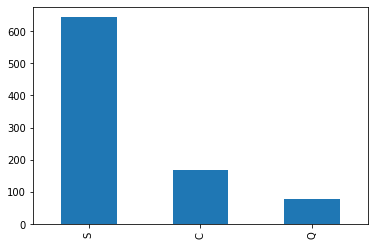

In [205]:
titanic_train['Embarked'].value_counts().plot(kind='bar')

In [206]:
#making a pivot table below to further explore numerical variables

In [207]:
pd.pivot_table(titanic_train, index='Survived', values= ['Age','SibSp','Parch','Fare'])

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.626179,22.117887,0.329690,0.553734
1,28.343690,48.395408,0.464912,0.473684


In [208]:
#making a pivot table to further explore relationship of categorical variables:

In [209]:
print(pd.pivot_table(titanic_train, index='Survived', columns='Pclass',values='Ticket',
                     aggfunc='count'))

print(pd.pivot_table(titanic_train, index='Survived', columns='Sex',values='Ticket',
                     aggfunc='count'))

print(pd.pivot_table(titanic_train, index='Survived', columns='Embarked',values='Ticket',
                     aggfunc='count'))

Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119
Sex       female  male
Survived              
0             81   468
1            233   109
Embarked   C   Q    S
Survived             
0         75  47  427
1         93  30  217


In [210]:
#Plotting trendlines below:

<AxesSubplot:xlabel='Age', ylabel='Survived'>

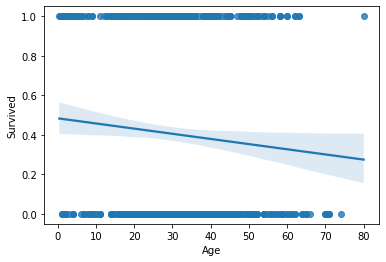

In [211]:
sns.regplot(x='Age', y='Survived', data=titanic_train)

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

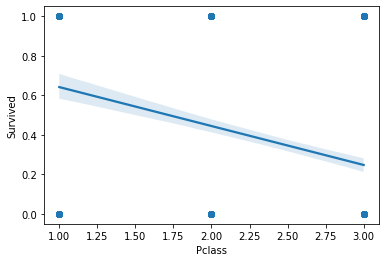

In [212]:
sns.regplot(x='Pclass', y='Survived', data=titanic_train)

<AxesSubplot:xlabel='Fare', ylabel='Survived'>

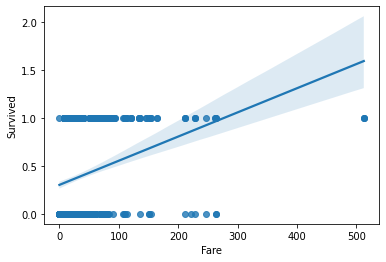

In [213]:
sns.regplot(x='Fare', y='Survived', data=titanic_train)

<AxesSubplot:xlabel='Age', ylabel='Fare'>

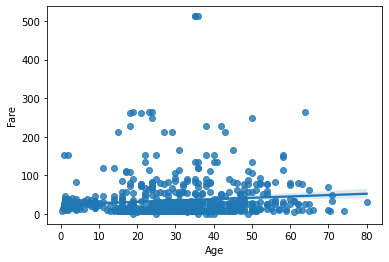

In [214]:
sns.regplot(x='Age', y='Fare', data=titanic_train)

In [215]:
#dealing with null values in the training set below:

In [216]:
#1st create a duplicate training set variable:

train1= titanic_train

In [217]:
train1.dropna(subset=['Embarked'], inplace=True)

In [218]:
train1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          712 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Cabin        202 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 90.3+ KB


In [219]:
# My thinking about how to best deal with the null values in the 'Age' attribute: 
# The mean is quite far from the median for this attribute as seen in the exploratory data analysis completed earlier in the .describe method. 
# I decided on the median as a more accurate measure of centre to replace the null values for the 'Age' variable as it is less affected by outliers. 


In [220]:
titanic_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [221]:
#imputing the median Age for null values in the training set variable (renamed to train 1 below). 
#Training set variable was renamed in order to retain original training set in case I need to retrace my steps. 
train1['Age']=train1['Age'].fillna(train1['Age'].median())

In [222]:
train1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Cabin        202 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 90.3+ KB


<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Cabin        202 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 90.3+ KB


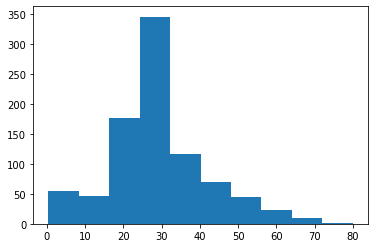

In [223]:
#looking at our new histogram of the the Age feature below (in train1 training set:)
plt.hist(train1['Age'])
train1.info()

In [224]:
#create a new test set variable below for missing value imputation:

test1= titanic_test

In [225]:
test1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [226]:
#imputing the median of the 'Age' feature from the training set (train1) into the null values for the test set 'Age' feature:
test1=titanic_test.copy()
test1.loc[:,'Age'] = test1['Age'].fillna(np.median(train1['Age']))

In [227]:
#imputing the median of the 'Fare' feature from the training set (train1) into the null value for the test set 'Fare' feature:
test1.loc[:,'Fare']= test1['Fare'].fillna(np.median(train1['Fare']))

In [228]:
test1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [229]:
test1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [230]:
#Create a new training set copy variable:

train2= train1.copy()


In [231]:
train2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Cabin        202 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 90.3+ KB


In [232]:
Sex_encoded= pd.get_dummies(train2['Sex'])

In [233]:
Sex_encoded

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [234]:
train3=pd.concat([train2, Sex_encoded], axis = 1)

In [235]:
train3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Cabin        202 non-null    object 
 11  Embarked     889 non-null    object 
 12  female       889 non-null    uint8  
 13  male         889 non-null    uint8  
dtypes: float64(2), int64(5), object(5), uint8(2)
memory usage: 92.0+ KB


<AxesSubplot:xlabel='male', ylabel='Survived'>

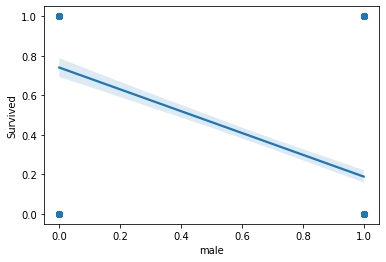

In [236]:
sns.regplot(x='male', y='Survived',data=train3)

<AxesSubplot:xlabel='female', ylabel='Survived'>

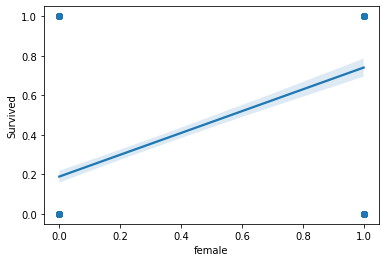

In [237]:
sns.regplot(x='female', y='Survived', data=train3)

In [238]:
#Below I will drop the 'Sex' feature from the training set now that 'male' and 'female' are added to the training set as one hot encoded features:
train4 = train3.drop(['Sex'], axis=1)
train4.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,female,male
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,1,0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S,0,1


In [239]:
#complete the same steps above to one hot encode the 'Sex' feature for the test set:
test2=test1.copy()

In [240]:
Sex_encoded_testset= pd.get_dummies(test2['Sex'])

In [241]:
Sex_encoded_testset

,female,male
0,0,1
1,1,0
2,0,1
3,0,1
4,1,0
...,...,...
413,0,1
414,1,0
415,0,1
416,0,1


In [242]:
test2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [243]:
test3=pd.concat([test2, Sex_encoded_testset], axis = 1)

In [244]:
test3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
 11  female       418 non-null    uint8  
 12  male         418 non-null    uint8  
dtypes: float64(2), int64(4), object(5), uint8(2)
memory usage: 36.9+ KB


In [245]:
test4 = test3.drop(['Sex'], axis=1)
test4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Age          418 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Ticket       418 non-null    object 
 7   Fare         418 non-null    float64
 8   Cabin        91 non-null     object 
 9   Embarked     418 non-null    object 
 10  female       418 non-null    uint8  
 11  male         418 non-null    uint8  
dtypes: float64(2), int64(4), object(4), uint8(2)
memory usage: 33.6+ KB


In [246]:
#Next, complete the same one hot encoding process for the 'Embarked' feature in both the training and test sets:

In [247]:
Embarked_encoded= pd.get_dummies(train4['Embarked'])

In [248]:
Embarked_encoded

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
886,0,0,1
887,0,0,1
888,0,0,1
889,1,0,0


In [249]:
train4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Age          889 non-null    float64
 5   SibSp        889 non-null    int64  
 6   Parch        889 non-null    int64  
 7   Ticket       889 non-null    object 
 8   Fare         889 non-null    float64
 9   Cabin        202 non-null    object 
 10  Embarked     889 non-null    object 
 11  female       889 non-null    uint8  
 12  male         889 non-null    uint8  
dtypes: float64(2), int64(5), object(4), uint8(2)
memory usage: 85.1+ KB


In [250]:
train5=pd.concat([train4, Embarked_encoded], axis = 1)
train5.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,female,male,C,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,0,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,1,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,1,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S,0,1,0,0,1


In [251]:
train6 = train5.drop(['Embarked'], axis=1)
train6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Age          889 non-null    float64
 5   SibSp        889 non-null    int64  
 6   Parch        889 non-null    int64  
 7   Ticket       889 non-null    object 
 8   Fare         889 non-null    float64
 9   Cabin        202 non-null    object 
 10  female       889 non-null    uint8  
 11  male         889 non-null    uint8  
 12  C            889 non-null    uint8  
 13  Q            889 non-null    uint8  
 14  S            889 non-null    uint8  
dtypes: float64(2), int64(5), object(3), uint8(5)
memory usage: 80.7+ KB


In [252]:
test5= test4.copy()

In [253]:
Embarked_encoded_testset= pd.get_dummies(test4['Embarked'])

In [254]:
Embarked_encoded_testset

,C,Q,S
0,0,1,0
1,0,0,1
2,0,1,0
3,0,0,1
4,0,0,1
...,...,...,...
413,0,0,1
414,1,0,0
415,0,0,1
416,0,0,1


In [255]:
test6=pd.concat([test5, Embarked_encoded_testset], axis = 1)
test6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Age          418 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Ticket       418 non-null    object 
 7   Fare         418 non-null    float64
 8   Cabin        91 non-null     object 
 9   Embarked     418 non-null    object 
 10  female       418 non-null    uint8  
 11  male         418 non-null    uint8  
 12  C            418 non-null    uint8  
 13  Q            418 non-null    uint8  
 14  S            418 non-null    uint8  
dtypes: float64(2), int64(4), object(4), uint8(5)
memory usage: 34.8+ KB


In [256]:
test7 = test6.drop(['Embarked'], axis=1)
test7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Age          418 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Ticket       418 non-null    object 
 7   Fare         418 non-null    float64
 8   Cabin        91 non-null     object 
 9   female       418 non-null    uint8  
 10  male         418 non-null    uint8  
 11  C            418 non-null    uint8  
 12  Q            418 non-null    uint8  
 13  S            418 non-null    uint8  
dtypes: float64(2), int64(4), object(3), uint8(5)
memory usage: 31.6+ KB


In [257]:
#Continuing with some more exploritory data anylsis below now that the 'Embarked' feature has been one hot encoded: As seen below, the port embarked from may have predictive power (mostly S and C columns) that can be included in the model:  

<AxesSubplot:xlabel='C', ylabel='Survived'>

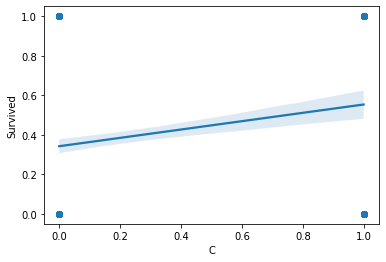

In [258]:
sns.regplot(x='C', y='Survived', data=train6)

<AxesSubplot:xlabel='Q', ylabel='Survived'>

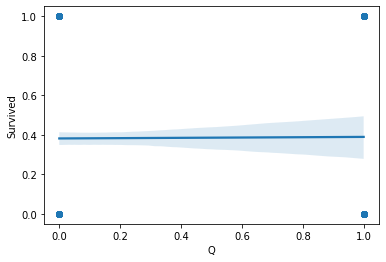

In [259]:
sns.regplot(x='Q', y='Survived', data=train6)

<AxesSubplot:xlabel='S', ylabel='Survived'>

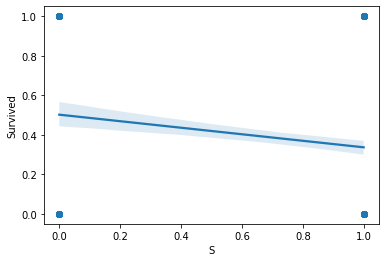

In [260]:
sns.regplot(x='S', y='Survived', data=train6)

In [261]:
#drop some of the variable columns from our training dataset that would be to difficult extract any type of predictive power from. I decided to move forward from the cabin feature
#and drop this feature as well as much of the data in the cabin feature is missing:

train7= train6.drop(["Cabin", "Ticket","Name", "PassengerId" ], axis=1)

In [262]:
#now drop the same variables in the test set: 
test8= test7.drop(["Cabin", "Ticket", "Name","PassengerId"], axis=1)

In [263]:
test8.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  418 non-null    int64  
 1   Age     418 non-null    float64
 2   SibSp   418 non-null    int64  
 3   Parch   418 non-null    int64  
 4   Fare    418 non-null    float64
 5   female  418 non-null    uint8  
 6   male    418 non-null    uint8  
 7   C       418 non-null    uint8  
 8   Q       418 non-null    uint8  
 9   S       418 non-null    uint8  
dtypes: float64(2), int64(3), uint8(5)
memory usage: 18.5 KB


In [264]:
train7.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Age       889 non-null    float64
 3   SibSp     889 non-null    int64  
 4   Parch     889 non-null    int64  
 5   Fare      889 non-null    float64
 6   female    889 non-null    uint8  
 7   male      889 non-null    uint8  
 8   C         889 non-null    uint8  
 9   Q         889 non-null    uint8  
 10  S         889 non-null    uint8  
dtypes: float64(2), int64(4), uint8(5)
memory usage: 53.0 KB


In [265]:
#in thinking about the Pclass variable: I'm going to treat this feature as categorical rather than continuous quantitative. I'm unsure how this distinction might affect the model's 
#performance, but, will apply a one hot encoder to the variable to make this distinction as it seems more suitible. 

In [266]:
Pclass_encoded= pd.get_dummies(train7['Pclass'])

In [267]:
Pclass_encoded

,1,2,3
0,0,0,1
1,1,0,0
2,0,0,1
3,1,0,0
4,0,0,1
...,...,...,...
886,0,1,0
887,1,0,0
888,0,0,1
889,1,0,0


In [268]:
train8= pd.concat([train7, Pclass_encoded], axis = 1)
train8.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Age       889 non-null    float64
 3   SibSp     889 non-null    int64  
 4   Parch     889 non-null    int64  
 5   Fare      889 non-null    float64
 6   female    889 non-null    uint8  
 7   male      889 non-null    uint8  
 8   C         889 non-null    uint8  
 9   Q         889 non-null    uint8  
 10  S         889 non-null    uint8  
 11  1         889 non-null    uint8  
 12  2         889 non-null    uint8  
 13  3         889 non-null    uint8  
dtypes: float64(2), int64(4), uint8(8)
memory usage: 55.6 KB


In [269]:
#drop training set PClass variable:

In [270]:
train9= train8.drop(["Pclass"],axis=1)

In [271]:
train9

,Survived,Age,SibSp,Parch,Fare,female,male,C,Q,S,1,2,3
0,0,22.0,1,0,7.2500,0,1,0,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0,1,0,0
2,1,26.0,0,0,7.9250,1,0,0,0,1,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1,1,0,0
4,0,35.0,0,0,8.0500,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,27.0,0,0,13.0000,0,1,0,0,1,0,1,0
887,1,19.0,0,0,30.0000,1,0,0,0,1,1,0,0
888,0,28.0,1,2,23.4500,1,0,0,0,1,0,0,1
889,1,26.0,0,0,30.0000,0,1,1,0,0,1,0,0


In [272]:
#Now, complete the same process to one hot encode the Pclass variable in the test set:
    
Pclass_encoded_t= pd.get_dummies(test8['Pclass'])    

In [273]:
Pclass_encoded_t

,1,2,3
0,0,0,1
1,0,0,1
2,0,1,0
3,0,0,1
4,0,0,1
...,...,...,...
413,0,0,1
414,1,0,0
415,0,0,1
416,0,0,1


In [274]:
test9=pd.concat([test8, Pclass_encoded_t],axis=1)
test9.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  418 non-null    int64  
 1   Age     418 non-null    float64
 2   SibSp   418 non-null    int64  
 3   Parch   418 non-null    int64  
 4   Fare    418 non-null    float64
 5   female  418 non-null    uint8  
 6   male    418 non-null    uint8  
 7   C       418 non-null    uint8  
 8   Q       418 non-null    uint8  
 9   S       418 non-null    uint8  
 10  1       418 non-null    uint8  
 11  2       418 non-null    uint8  
 12  3       418 non-null    uint8  
dtypes: float64(2), int64(3), uint8(8)
memory usage: 19.7 KB


In [275]:
#Drop the Pclass test set variable:

test10=test9.drop(["Pclass"],axis=1)

In [276]:
test10.head()

,Age,SibSp,Parch,Fare,female,male,C,Q,S,1,2,3
0,34.5,0,0,7.8292,0,1,0,1,0,0,0,1
1,47.0,1,0,7.0000,1,0,0,0,1,0,0,1
2,62.0,0,0,9.6875,0,1,0,1,0,0,1,0
3,27.0,0,0,8.6625,0,1,0,0,1,0,0,1
4,22.0,1,1,12.2875,1,0,0,0,1,0,0,1


In [277]:
#next, make the 'Survived' variable as its own training set y column:

train_y= train9.filter(['Survived'])

In [278]:
train_y

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


In [279]:
#I will now drop the "Survived" column from the training set matrix:

train10=train9.drop(["Survived"], axis=1)

In [280]:
train10.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Age     889 non-null    float64
 1   SibSp   889 non-null    int64  
 2   Parch   889 non-null    int64  
 3   Fare    889 non-null    float64
 4   female  889 non-null    uint8  
 5   male    889 non-null    uint8  
 6   C       889 non-null    uint8  
 7   Q       889 non-null    uint8  
 8   S       889 non-null    uint8  
 9   1       889 non-null    uint8  
 10  2       889 non-null    uint8  
 11  3       889 non-null    uint8  
dtypes: float64(2), int64(2), uint8(8)
memory usage: 41.7 KB


<AxesSubplot:>

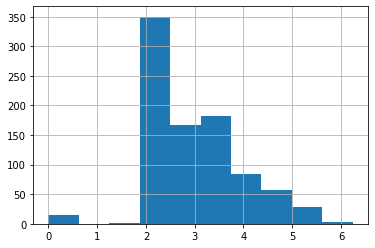

In [281]:
#next I'll apply a power transform to the "fare" column in the training set as it is a heavily right skewed distribution (continuous variable) that will need to have a more normalized distribution in order to work well with my model:

train10['Fare']= np.log(train10.Fare+1)
train10['Fare'].hist()




<AxesSubplot:>

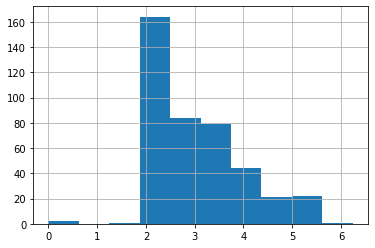

In [282]:
#Apply the same to the test set:

test10['Fare']= np.log(test10.Fare+1)
test10['Fare'].hist()


<AxesSubplot:>

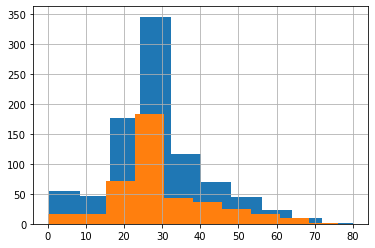

In [283]:
#Age is fairly normally distrubed so no transform needed here
train10['Age'].hist()
test10['Age'].hist()

In [284]:
train10.describe()


,Age,SibSp,Parch,Fare,female,male,C,Q,S,1,2,3
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,29.315152,0.524184,0.382452,2.959024,0.350956,0.649044,0.188976,0.086614,0.724409,0.240720,0.206974,0.552306
std,12.984932,1.103705,0.806761,0.967750,0.477538,0.477538,0.391710,0.281427,0.447063,0.427761,0.405365,0.497536
min,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.000000,0.000000,0.000000,2.185579,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,28.000000,0.000000,0.000000,2.737881,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,35.000000,1.000000,0.000000,3.465736,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
max,80.000000,8.000000,6.000000,6.240917,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [285]:
test10.describe()

,Age,SibSp,Parch,Fare,female,male,C,Q,S,1,2,3
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,29.805024,0.447368,0.392344,3.015421,0.363636,0.636364,0.244019,0.110048,0.645933,0.255981,0.222488,0.521531
std,12.667969,0.896760,0.981429,0.966932,0.481622,0.481622,0.430019,0.313324,0.478803,0.436934,0.416416,0.500135
min,0.170000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,0.000000,0.000000,2.185579,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,28.000000,0.000000,0.000000,2.737881,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,35.750000,1.000000,0.000000,3.480373,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000
max,76.000000,8.000000,9.000000,6.240917,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [286]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train11_scaled= train10.copy()
train11_scaled[['Age','SibSp','Parch','Fare']]=scaler.fit_transform(train11_scaled[['Age','SibSp','Parch','Fare']])
train11_scaled.info()
train11_scaled.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Age     889 non-null    float64
 1   SibSp   889 non-null    float64
 2   Parch   889 non-null    float64
 3   Fare    889 non-null    float64
 4   female  889 non-null    uint8  
 5   male    889 non-null    uint8  
 6   C       889 non-null    uint8  
 7   Q       889 non-null    uint8  
 8   S       889 non-null    uint8  
 9   1       889 non-null    uint8  
 10  2       889 non-null    uint8  
 11  3       889 non-null    uint8  
dtypes: float64(4), uint8(8)
memory usage: 41.7 KB


,Age,SibSp,Parch,Fare,female,male,C,Q,S,1,2,3
count,8.890000e+02,8.890000e+02,8.890000e+02,8.890000e+02,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,2.717486e-16,-3.197043e-17,-4.795564e-17,-2.882334e-16,0.350956,0.649044,0.188976,0.086614,0.724409,0.240720,0.206974,0.552306
std,1.000563e+00,1.000563e+00,1.000563e+00,1.000563e+00,0.477538,0.477538,0.391710,0.281427,0.447063,0.427761,0.405365,0.497536
min,-2.226536e+00,-4.751991e-01,-4.743259e-01,-3.059355e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-5.636741e-01,-4.751991e-01,-4.743259e-01,-7.996695e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-1.013399e-01,-4.751991e-01,-4.743259e-01,-2.286411e-01,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,4.380499e-01,4.313502e-01,-4.743259e-01,5.238932e-01,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
max,3.905556e+00,6.777195e+00,6.967010e+00,3.393172e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [287]:
#And now for the test set:

scaler = StandardScaler()
test11= test10.copy()
test11[['Age','SibSp','Parch','Fare']]=scaler.fit_transform(test11[['Age','SibSp','Parch','Fare']])
test11.info()
test11.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Age     418 non-null    float64
 1   SibSp   418 non-null    float64
 2   Parch   418 non-null    float64
 3   Fare    418 non-null    float64
 4   female  418 non-null    uint8  
 5   male    418 non-null    uint8  
 6   C       418 non-null    uint8  
 7   Q       418 non-null    uint8  
 8   S       418 non-null    uint8  
 9   1       418 non-null    uint8  
 10  2       418 non-null    uint8  
 11  3       418 non-null    uint8  
dtypes: float64(4), uint8(8)
memory usage: 16.5 KB


,Age,SibSp,Parch,Fare,female,male,C,Q,S,1,2,3
count,4.180000e+02,4.180000e+02,4.180000e+02,4.180000e+02,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,-1.274897e-16,-1.593622e-17,-2.974760e-17,3.187243e-16,0.363636,0.636364,0.244019,0.110048,0.645933,0.255981,0.222488,0.521531
std,1.001198e+00,1.001198e+00,1.001198e+00,1.001198e+00,0.481622,0.481622,0.430019,0.313324,0.478803,0.436934,0.416416,0.500135
min,-2.342170e+00,-4.994700e-01,-4.002477e-01,-3.122281e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-5.378272e-01,-4.994700e-01,-4.002477e-01,-8.592498e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-1.426580e-01,-4.994700e-01,-4.002477e-01,-2.873759e-01,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,4.698543e-01,6.169924e-01,-4.002477e-01,4.814289e-01,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000
max,3.650967e+00,8.432229e+00,8.781044e+00,3.339801e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [288]:
y=train9['Survived']
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 889, dtype: int64

In [289]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test= train_test_split(train11_scaled, y, test_size=0.25, random_state=101)

In [290]:
from sklearn.linear_model import LogisticRegression
log_clf = LogisticRegression()
classifier=log_clf.fit(X_train,y_train)

y_pred=classifier.predict(X_test)

from sklearn.metrics import classification_report,confusion_matrix,\
accuracy_score

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[126  10]
 [ 27  60]]
              precision    recall  f1-score   support

           0       0.82      0.93      0.87       136
           1       0.86      0.69      0.76        87

    accuracy                           0.83       223
   macro avg       0.84      0.81      0.82       223
weighted avg       0.84      0.83      0.83       223

0.8340807174887892


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


<AxesSubplot:>

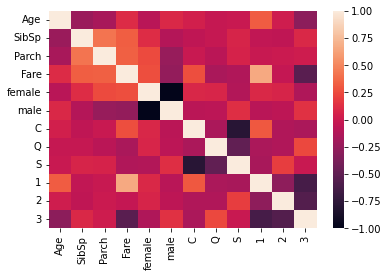

In [291]:
#looking at the variable heatmap below, we can drop the 'male' feature as it is 100% negatively correlated with the female feature (duplicate information) which could be causing over-fitting in our model.
sns.heatmap(train11_scaled.corr())

<AxesSubplot:>

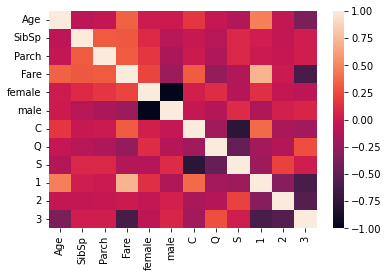

In [292]:
sns.heatmap(test11.corr())

In [293]:
train12_scaled= train11_scaled.drop(['male'], axis=1)

In [294]:
train12_scaled

,Age,SibSp,Parch,Fare,female,C,Q,S,1,2,3
0,-0.563674,0.431350,-0.474326,-0.877591,0,0,0,1,0,0,1
1,0.669217,0.431350,-0.474326,1.366380,1,1,0,0,1,0,0
2,-0.255451,-0.475199,-0.474326,-0.796281,1,0,0,1,0,0,1
3,0.438050,0.431350,-0.474326,1.066796,1,0,0,1,1,0,0
4,0.438050,-0.475199,-0.474326,-0.781901,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,-0.178396,-0.475199,-0.474326,-0.330815,0,0,0,1,0,1,0
887,-0.794841,-0.475199,-0.474326,0.491068,1,0,0,1,1,0,0
888,-0.101340,0.431350,2.006119,0.245663,1,0,0,1,0,0,1
889,-0.255451,-0.475199,-0.474326,0.491068,0,1,0,0,1,0,0


In [295]:
test12=test11.drop(['male'],axis=1)
test12

,Age,SibSp,Parch,Fare,female,C,Q,S,1,2,3
0,0.371062,-0.499470,-0.400248,-0.867031,0,0,1,0,0,0,1
1,1.358985,0.616992,-0.400248,-0.969149,1,0,0,1,0,0,1
2,2.544493,-0.499470,-0.400248,-0.669252,0,0,1,0,0,1,0
3,-0.221692,-0.499470,-0.400248,-0.773647,0,0,0,1,0,0,1
4,-0.616861,0.616992,0.619896,-0.443786,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
413,-0.142658,-0.499470,-0.400248,-0.841455,0,0,0,1,0,0,1
414,0.726714,-0.499470,-0.400248,1.743832,1,1,0,0,1,0,0
415,0.687197,-0.499470,-0.400248,-0.937287,0,0,0,1,0,0,1
416,-0.142658,-0.499470,-0.400248,-0.841455,0,0,0,1,0,0,1


In [296]:
#now I will re-run logistic regression to see how the model's accuracy is affected:

X_train, X_test, y_train, y_test= train_test_split(train12_scaled, y, test_size=0.25, random_state=101)


from sklearn.linear_model import LogisticRegression
log_clf = LogisticRegression()
classifier1=log_clf.fit(X_train,y_train)

y_pred=classifier1.predict(X_test)

from sklearn.metrics import classification_report,confusion_matrix,\
accuracy_score

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[127   9]
 [ 27  60]]
              precision    recall  f1-score   support

           0       0.82      0.93      0.88       136
           1       0.87      0.69      0.77        87

    accuracy                           0.84       223
   macro avg       0.85      0.81      0.82       223
weighted avg       0.84      0.84      0.83       223

0.8385650224215246


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [297]:
#training a support vector classification algorithm below to see if accuracy is better than with logistic regression above:

from sklearn import svm
svc= svm.SVC()

X_train, X_test, y_train, y_test= train_test_split(train12_scaled, y, test_size=0.25, random_state=101)

classifier2= svc.fit(X_train, y_train)

y_pred=classifier2.predict(X_test)

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))



[[127   9]
 [ 24  63]]
              precision    recall  f1-score   support

           0       0.84      0.93      0.89       136
           1       0.88      0.72      0.79        87

    accuracy                           0.85       223
   macro avg       0.86      0.83      0.84       223
weighted avg       0.85      0.85      0.85       223

0.852017937219731


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [298]:
#And now training the K-nearest neighbors classifier:

from sklearn.neighbors import KNeighborsClassifier

K_clf= KNeighborsClassifier(n_neighbors=5)

X_train, X_test, y_train, y_test= train_test_split(train12_scaled, y, test_size=0.25, random_state=101)

classifier4= K_clf.fit(X_train, y_train)

y_pred=classifier4.predict(X_test)

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[116  20]
 [ 22  65]]
              precision    recall  f1-score   support

           0       0.84      0.85      0.85       136
           1       0.76      0.75      0.76        87

    accuracy                           0.81       223
   macro avg       0.80      0.80      0.80       223
weighted avg       0.81      0.81      0.81       223

0.8116591928251121


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [299]:
#below I will run the support vector machines algorithm (which had the highest accuracy for our training set) on the Kaggle test set for my first competetion submission:

yhat_test_set = classifier2.predict(test12)

yhat_test_set


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [300]:
#I will convert the yhat_test_set prediction into a pandas dataframe:

yhat= pd.DataFrame(yhat_test_set)
yhat.rename(columns={yhat.columns[0]:'Survived'} , inplace=True)
yhat

,Survived
0,0
1,0
2,0
3,0
4,0
...,...
413,0
414,1
415,0
416,0


In [301]:
#In the steps below, the PassengerId column will need to be concatenated with our 'yhat' prediction into a data frame so that the proper format can be submitted for the Kaggle competetion for my first prediction:

Id= titanic_test.filter(["PassengerId"])


In [302]:
Id

,PassengerId
0,892
1,893
2,894
3,895
4,896
...,...
413,1305
414,1306
415,1307
416,1308


In [303]:
yhat_sub= pd.concat([Id, yhat], axis = 1)
yhat_sub

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [304]:
#convert the data frame to a csv file for upload to Kaggle:

yhat_sub.to_csv('/kaggle/working/sub.csv')

In [305]:
#Per the above competition submission, my model using Support Vector Machines had a 77% accuracy score after upload/submission

#After comparing the training set accuracy to the submitted test set accuracy, my chosen model here (using the svm alogrithm) overit the training set by a good margin. Given that I'd like a higher accuracy score, I will now try dropping some more of the highly correlated features (see heatmap above) to see if there is any improvement in the submitted test set accuracy score:



<AxesSubplot:>

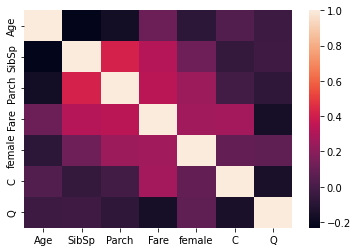

In [306]:
#Dropping the class categories of 1, 2, 3 which were highly correlated with our 'Fare' variable.
#We will see if this simpler model improves accuracy without losing predictive power. Fare variable to stay.
#Embarked port 'S' to also be dropped while leaving 'S' and 'Q' ports. 
#Our new heatmap below shows -2.0 is now the stongest negative correlation.  

train13= train12_scaled.drop([1, 2, 3,"S" ], axis=1)
sns.heatmap(train13.corr())

<AxesSubplot:>

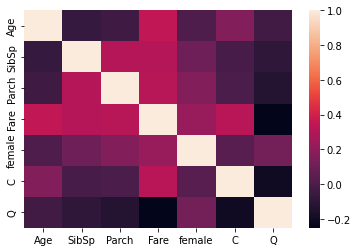

In [307]:
#And now on the test set: 
test13= test12.drop([1, 2, 3,"S" ], axis=1)
sns.heatmap(test13.corr())

In [308]:
#retrain the support vector machines algorithm below with our new training set with some features dropped:
# note that our "y" feature (survived column) remains unchanged.


from sklearn import svm
svc= svm.SVC()

X_train, X_test, y_train, y_test= train_test_split(train13, y, test_size=0.25, random_state=101)

classifier2= svc.fit(X_train, y_train)

y_pred=classifier2.predict(X_test)

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[126  10]
 [ 23  64]]
              precision    recall  f1-score   support

           0       0.85      0.93      0.88       136
           1       0.86      0.74      0.80        87

    accuracy                           0.85       223
   macro avg       0.86      0.83      0.84       223
weighted avg       0.85      0.85      0.85       223

0.852017937219731


In [309]:
#Interesting! The overall accuracy remained the smae on the SVM training set. Recall improved slightly at the small expense of precision. I suspect that we are still overfitting for other reasons, perhaps not the best algo for submission, 
#I will now try to re-train using our new data with the random forests algo below:


In [310]:
from sklearn.ensemble import RandomForestClassifier

rf= RandomForestClassifier(random_state=42, n_estimators=500)

X_train, X_test, y_train, y_test= train_test_split(train13, y, test_size=0.25, random_state=101)

classifier3= rf.fit(X_train, y_train)

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[126  10]
 [ 23  64]]
              precision    recall  f1-score   support

           0       0.85      0.93      0.88       136
           1       0.86      0.74      0.80        87

    accuracy                           0.85       223
   macro avg       0.86      0.83      0.84       223
weighted avg       0.85      0.85      0.85       223

0.852017937219731


In [311]:
#Wow! The reandom forests algorithm now acheived the same predictions on the new training set as the SVM algo: smae confusion matrix and overall accuracy.
#The is a greatly improved score for random forests (using the new training set)
#I will now work on submitted both model predictions on the test set format that Kaggle has outlined
#It will be very interesting to see which algo overfits and by how much, or if they both overfit. Hopefully the submission score will improve. 


In [312]:
#First for Support Vector Machines:

yhat_test_set2 = classifier2.predict(test13)

yhat_test_set2

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [313]:
yhat2= pd.DataFrame(yhat_test_set2)
yhat2.rename(columns={yhat.columns[0]:'Survived'} , inplace=True)
yhat2

,0
0,0
1,0
2,0
3,0
4,1
...,...
413,0
414,1
415,0
416,0


In [314]:
yhat_sub2= pd.concat([Id, yhat2], axis = 1)
yhat_sub2

,PassengerId,0
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [315]:
#convert the data frame to a csv file for upload to Kaggle:

yhat_sub2.to_csv('/kaggle/working/sub2.csv')

In [316]:
#With the new training set (selected features dropped) accuracy of the new submission was 76.5% which showed a decrease of 0.5 % accuracy from my first SVM submission. So..overfitting to about the same degree with SVM


In [317]:
#Next, I will try the most recent random forests prediction (using the most recent training data features): 
yhat_test_set3 = classifier3.predict(test13)

yhat_test_set3

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [318]:
yhat3= pd.DataFrame(yhat_test_set3)
yhat3.rename(columns={yhat.columns[0]:'Survived'} , inplace=True)
yhat3

,0
0,0
1,0
2,0
3,0
4,0
...,...
413,0
414,1
415,0
416,0


In [319]:
yhat_sub3= pd.concat([Id, yhat3], axis = 1)
yhat_sub3

,PassengerId,0
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [320]:
yhat_sub3.to_csv('/kaggle/working/sub3.csv')

In [321]:
#Random forest submitted to Kaggle test set with around 76% accuracy and so the training set was overfit here as well. 

In [322]:
#Ok, our models above are overfitting, I will try k-nearest neighbours below with our simplified training set (As per above, some features dropped). Number of neighbors set to 8 below which seemed optimal for highest training set accuracy. 

In [323]:
from sklearn.neighbors import KNeighborsClassifier

K_clf= KNeighborsClassifier(n_neighbors=8)

X_train, X_test, y_train, y_test= train_test_split(train13, y, test_size=0.25, random_state=101)

classifier4= K_clf.fit(X_train, y_train)

y_pred=classifier4.predict(X_test)

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[126  10]
 [ 25  62]]
              precision    recall  f1-score   support

           0       0.83      0.93      0.88       136
           1       0.86      0.71      0.78        87

    accuracy                           0.84       223
   macro avg       0.85      0.82      0.83       223
weighted avg       0.84      0.84      0.84       223

0.8430493273542601


In [324]:
yhat_test_set4 = classifier4.predict(test13)

yhat_test_set4

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [325]:
yhat4= pd.DataFrame(yhat_test_set2)
yhat4.rename(columns={yhat.columns[0]:'Survived'} , inplace=True)
yhat4

,0
0,0
1,0
2,0
3,0
4,1
...,...
413,0
414,1
415,0
416,0


In [326]:
yhat4= pd.concat([Id, yhat4], axis = 1)
yhat4

,PassengerId,0
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [327]:
yhat4.to_csv('/kaggle/working/sub4.csv')

In [328]:
#per the above Kaggle test set model submission using KNN, accuracy was also roughly 76%. 



In [329]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test= train_test_split(train13, y, test_size=0.25, random_state=101)

In [330]:

log= LogisticRegression()
classifier5=log.fit(X_train,y_train)

y_pred5=classifier5.predict(X_test)

from sklearn.metrics import classification_report,confusion_matrix,\
accuracy_score

print(confusion_matrix(y_test,y_pred5))
print(classification_report(y_test, y_pred5))
print(accuracy_score(y_test, y_pred5))

[[124  12]
 [ 29  58]]
              precision    recall  f1-score   support

           0       0.81      0.91      0.86       136
           1       0.83      0.67      0.74        87

    accuracy                           0.82       223
   macro avg       0.82      0.79      0.80       223
weighted avg       0.82      0.82      0.81       223

0.8161434977578476


In [331]:
yhat_test_set5 = classifier5.predict(test13)

yhat_test_set5

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [332]:
yhat5= pd.DataFrame(yhat_test_set5)
yhat5.rename(columns={yhat.columns[0]:'Survived'} , inplace=True)
yhat5

,0
0,0
1,0
2,0
3,0
4,1
...,...
413,0
414,1
415,0
416,0


In [333]:
yhat5= pd.concat([Id, yhat5], axis = 1)
yhat5

,PassengerId,0
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [334]:
yhat5.to_csv('/kaggle/working/sub5.csv')

In [335]:
#About 75.5% accuracy using the logistic regression algo on the test 13 data set with some features eliminated. 
#conclusion: eliminating correlated features actually hurts the overall accuracy score (for submitted test set models) in all of the algrorithms that we tried above, 
#this may be because the data set is already quite small at less than 1000 observations in the training set and less than 500 observations in the test set used for predictions/kaggle submission
#Next, I will look at some feature engineering below using the train12_scaled dataset that resulted in the best accuracy score of 77% when submitted using the SVM algorithm. 
#Re: I will engineer a feature: sqrt of 'Fare' - PClass (continous feature) / sqrt of 'Age' to see if this can have any predictive value toward improving the best submitted test set accuracy score of 77%.  


In [336]:
train12_scaled['New']= (train7["Fare"].pow(1./2) - train7["Pclass"]) / train7["Age"].pow(1./2)
train12_scaled.head()



,Age,SibSp,Parch,Fare,female,C,Q,S,1,2,3,New
0,-0.563674,0.431350,-0.474326,-0.877591,0,0,0,1,0,0,1,-0.065542
1,0.669217,0.431350,-0.474326,1.366380,1,1,0,0,1,0,0,1.207405
2,-0.255451,-0.475199,-0.474326,-0.796281,1,0,0,1,0,0,1,-0.036254
3,0.438050,0.431350,-0.474326,1.066796,1,0,0,1,1,0,0,1.062693
4,0.438050,-0.475199,-0.474326,-0.781901,0,0,0,1,0,0,1,-0.027509


<AxesSubplot:>

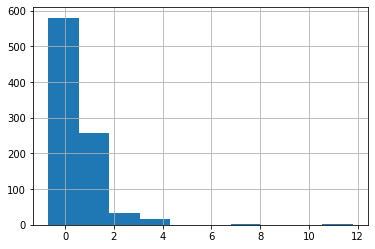

In [337]:
train12_scaled['New'].hist()

<AxesSubplot:>

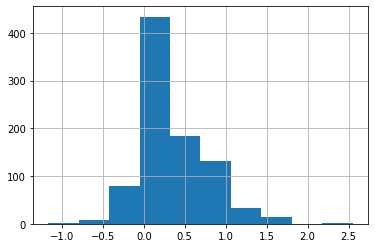

In [338]:
#Per the histogram above, I'll apply a power transform to see if the distribution of this variable can be better normalized
train12_scaled['New']= np.log(train12_scaled.New+1)
train12_scaled['New'].hist()

In [339]:
test12['New']= (test7["Fare"].pow(1./2) - test7["Pclass"]) / test7["Age"].pow(1./2)

test12.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Age     418 non-null    float64
 1   SibSp   418 non-null    float64
 2   Parch   418 non-null    float64
 3   Fare    418 non-null    float64
 4   female  418 non-null    uint8  
 5   C       418 non-null    uint8  
 6   Q       418 non-null    uint8  
 7   S       418 non-null    uint8  
 8   1       418 non-null    uint8  
 9   2       418 non-null    uint8  
 10  3       418 non-null    uint8  
 11  New     418 non-null    float64
dtypes: float64(5), uint8(7)
memory usage: 19.3 KB


<AxesSubplot:>

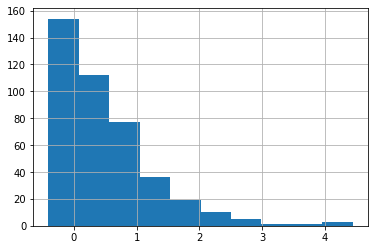

In [340]:
test12['New'].hist()

/opt/conda/lib/python3.7/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<AxesSubplot:>

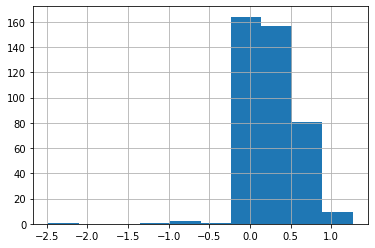

In [341]:
#now I'll apply the same training set sqrt power transform to the test set:
test12['New']= np.log(train12_scaled.New+1)
test12['New'].hist()

In [342]:
from sklearn import svm
svc= svm.SVC()

X_train, X_test, y_train, y_test= train_test_split(train12_scaled, y, test_size=0.25, random_state=101)

classifier6= svc.fit(X_train, y_train)

y_pred=classifier6.predict(X_test)

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[127   9]
 [ 25  62]]
              precision    recall  f1-score   support

           0       0.84      0.93      0.88       136
           1       0.87      0.71      0.78        87

    accuracy                           0.85       223
   macro avg       0.85      0.82      0.83       223
weighted avg       0.85      0.85      0.84       223

0.8475336322869955


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [343]:
from sklearn.ensemble import RandomForestClassifier

rf= RandomForestClassifier(random_state=42, n_estimators=500)

X_train, X_test, y_train, y_test= train_test_split(train12_scaled, y, test_size=0.25, random_state=101)

classifier7= rf.fit(X_train, y_train)

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


[[127   9]
 [ 25  62]]
              precision    recall  f1-score   support

           0       0.84      0.93      0.88       136
           1       0.87      0.71      0.78        87

    accuracy                           0.85       223
   macro avg       0.85      0.82      0.83       223
weighted avg       0.85      0.85      0.84       223

0.8475336322869955


In [344]:
yhat_test_set6 = classifier6.predict(test12)

yhat_test_set6

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
yhat6= pd.DataFrame(yhat_test_set6)
yhat6.rename(columns={yhat.columns[0]:'Survived'} , inplace=True)
yhat6

In [ ]:
yhat6= pd.concat([Id, yhat6], axis = 1)
yhat6

In [ ]:
yhat6.to_csv('/kaggle/working/sub10.csv')

In [ ]:
#Ok, per above submission, I'm back to a 77% accuracy score. Less overfitting from the training set but same as our best accuracy score on first test set submission, 
#I will now try the same process with the new data set feature using the random forests algo submission:



In [ ]:
yhat_test_set7 = classifier7.predict(test12)

yhat_test_set7

In [ ]:
yhat7= pd.DataFrame(yhat_test_set7)
yhat7.rename(columns={yhat.columns[0]:'Survived'} , inplace=True)
yhat7

In [ ]:
yhat7= pd.concat([Id, yhat7], axis = 1)
yhat7

In [ ]:
yhat7.to_csv('/kaggle/working/sub11.csv')

In [ ]:
#Per above, the accuracy improved slightly from previous (now at 77.5% using random forests on the new feature engineered test set.

#Best accuracy score for Kaggle test set submission is now at 77.77% using Support vector machines. 

#Future ideas to further improve test set accuracy: Since we have a smaller data set where every data point can potentially contribute to more accuracte model, try using Kfold cross validation to use the entire training set across multiple folds of train-test split.
#Also try modeling the XGBoost algo the future to see if the submitted model can yield higher accuracy compared to Support Vector Machines and Random Forests. 